## 读取数据

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
# DAU
dau = pd.read_csv('data/section4-dau.csv', date_parser=True)

In [31]:
dau.head(2)

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598


In [33]:
# 用户信息
user_info = pd.read_csv('data/section4-user_info.csv')

In [35]:
user_info.head(2)

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android


In [40]:
# 合并DAU和用户信息
dau_user_info = pd.merge(dau, user_info, on=['user_id', 'app_name'])

In [41]:
dau_user_info.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,M,50,iOS


In [42]:
dau_user_info['log_month'] = dau_user_info['log_date'].map(lambda x: x[0: 7])

## 用户群分析

In [43]:
# 按性别统计
dau_user_info.pivot_table(index='log_month', columns='gender', values='user_id', aggfunc=len)

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


In [44]:
# 按年龄段统计
dau_user_info.pivot_table(index='log_month', columns='generation', values='user_id', aggfunc=len)

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [45]:
# 按性别年龄统计
dau_user_info.pivot_table(index='log_month', columns=['gender', 'generation'], values='user_id', aggfunc=len)

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

In [46]:
# 按设备统计
dau_user_info.pivot_table(index='log_month', columns='device_type', values='user_id', aggfunc=len)

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


In [47]:
# 按日期和设备类型计算用户数
dau_user_info_device_summary = dau_user_info.pivot_table(index='log_date', columns='device_type', values='user_id', aggfunc=len)

In [48]:
dau_user_info_device_summary.head()

device_type,Android,iOS
log_date,,
2013-08-01,1784,1805
2013-08-02,1386,1451
2013-08-03,1295,1351
2013-08-04,1283,1314
2013-08-05,2002,2038


In [49]:
# 转换日期类型
dau_user_info_device_summary.index = pd.to_datetime(dau_user_info_device_summary.index)

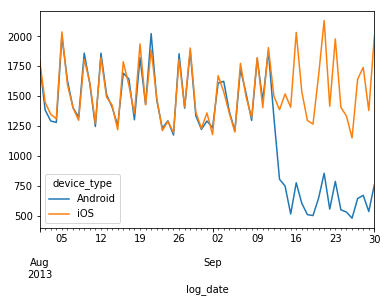

In [50]:
# 画出时间序列趋势图
import matplotlib.dates as mdates

fig, ax = plt.subplots()

dau_user_info_device_summary.plot(ax=ax)
# plt.legend(loc='center right')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))